In [1]:
import pandas as pd
import numpy as np
import missingno as msno
from tabulate import tabulate
from datetime import time as dt_time
import time as tm

print("Setup complete")

file = "household_power_consumption.csv"

Setup complete


In [2]:
def print_head(data, n=5):
    if isinstance(data, pd.DataFrame):
        table_data = data.head(n).values.tolist()
        headers = data.columns.tolist()
        print(f"Перші кілька DataFrame:")
        print(tabulate(table_data, headers=headers, tablefmt='pretty'))
    elif isinstance(data, np.ndarray):
        table_data = data[:n].tolist()
        print(f"\nПерші кілька рядків NumPy масиву:")
        print(tabulate(table_data, tablefmt='pretty'))
    else:
        print("Непідтримуваний тип даних. Підтримуються лише DataFrame або NumPy масив.")

In [3]:
def create_numpy_arr(file1):
    data = np.genfromtxt(file1, delimiter=',')
    data[:,2:8] = data[:,2:8].astype(np.float64)
    return data

In [4]:
def create_data_frame(file1):
    header =["Date", "Time", "Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]

    dtype = {
        'Global_active_power': float,
        'Global_reactive_power': float,
        'Voltage': float,
        'Global_intensity': float,
        'Sub_metering_1': float,
        'Sub_metering_2': float,
        'Sub_metering_3': float
    }

    na_values = ['?']
    df1 = pd.read_csv(file1, dtype=dtype, na_values=na_values)

    df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)
    df1['Time'] = pd.to_datetime(df1['Time'], format='%H:%M:%S').dt.time
    df1 = df1.dropna()
    msno.matrix(df1)

    return df1


Перші кілька рядків NumPy масиву:
+-----+-----+-------+-------+--------+------+-----+-----+------+
| nan | nan |  nan  |  nan  |  nan   | nan  | nan | nan | nan  |
| nan | nan | 4.216 | 0.418 | 234.84 | 18.4 | 0.0 | 1.0 | 17.0 |
| nan | nan | 5.36  | 0.436 | 233.63 | 23.0 | 0.0 | 1.0 | 16.0 |
| nan | nan | 5.374 | 0.498 | 233.29 | 23.0 | 0.0 | 2.0 | 17.0 |
| nan | nan | 5.388 | 0.502 | 233.74 | 23.0 | 0.0 | 1.0 | 17.0 |
| nan | nan | 3.666 | 0.528 | 235.68 | 15.8 | 0.0 | 1.0 | 17.0 |
| nan | nan | 3.52  | 0.522 | 235.02 | 15.0 | 0.0 | 2.0 | 17.0 |
| nan | nan | 3.702 | 0.52  | 235.09 | 15.8 | 0.0 | 1.0 | 17.0 |
| nan | nan |  3.7  | 0.52  | 235.22 | 15.8 | 0.0 | 1.0 | 17.0 |
| nan | nan | 3.668 | 0.51  | 233.99 | 15.8 | 0.0 | 1.0 | 17.0 |
+-----+-----+-------+-------+--------+------+-----+-----+------+


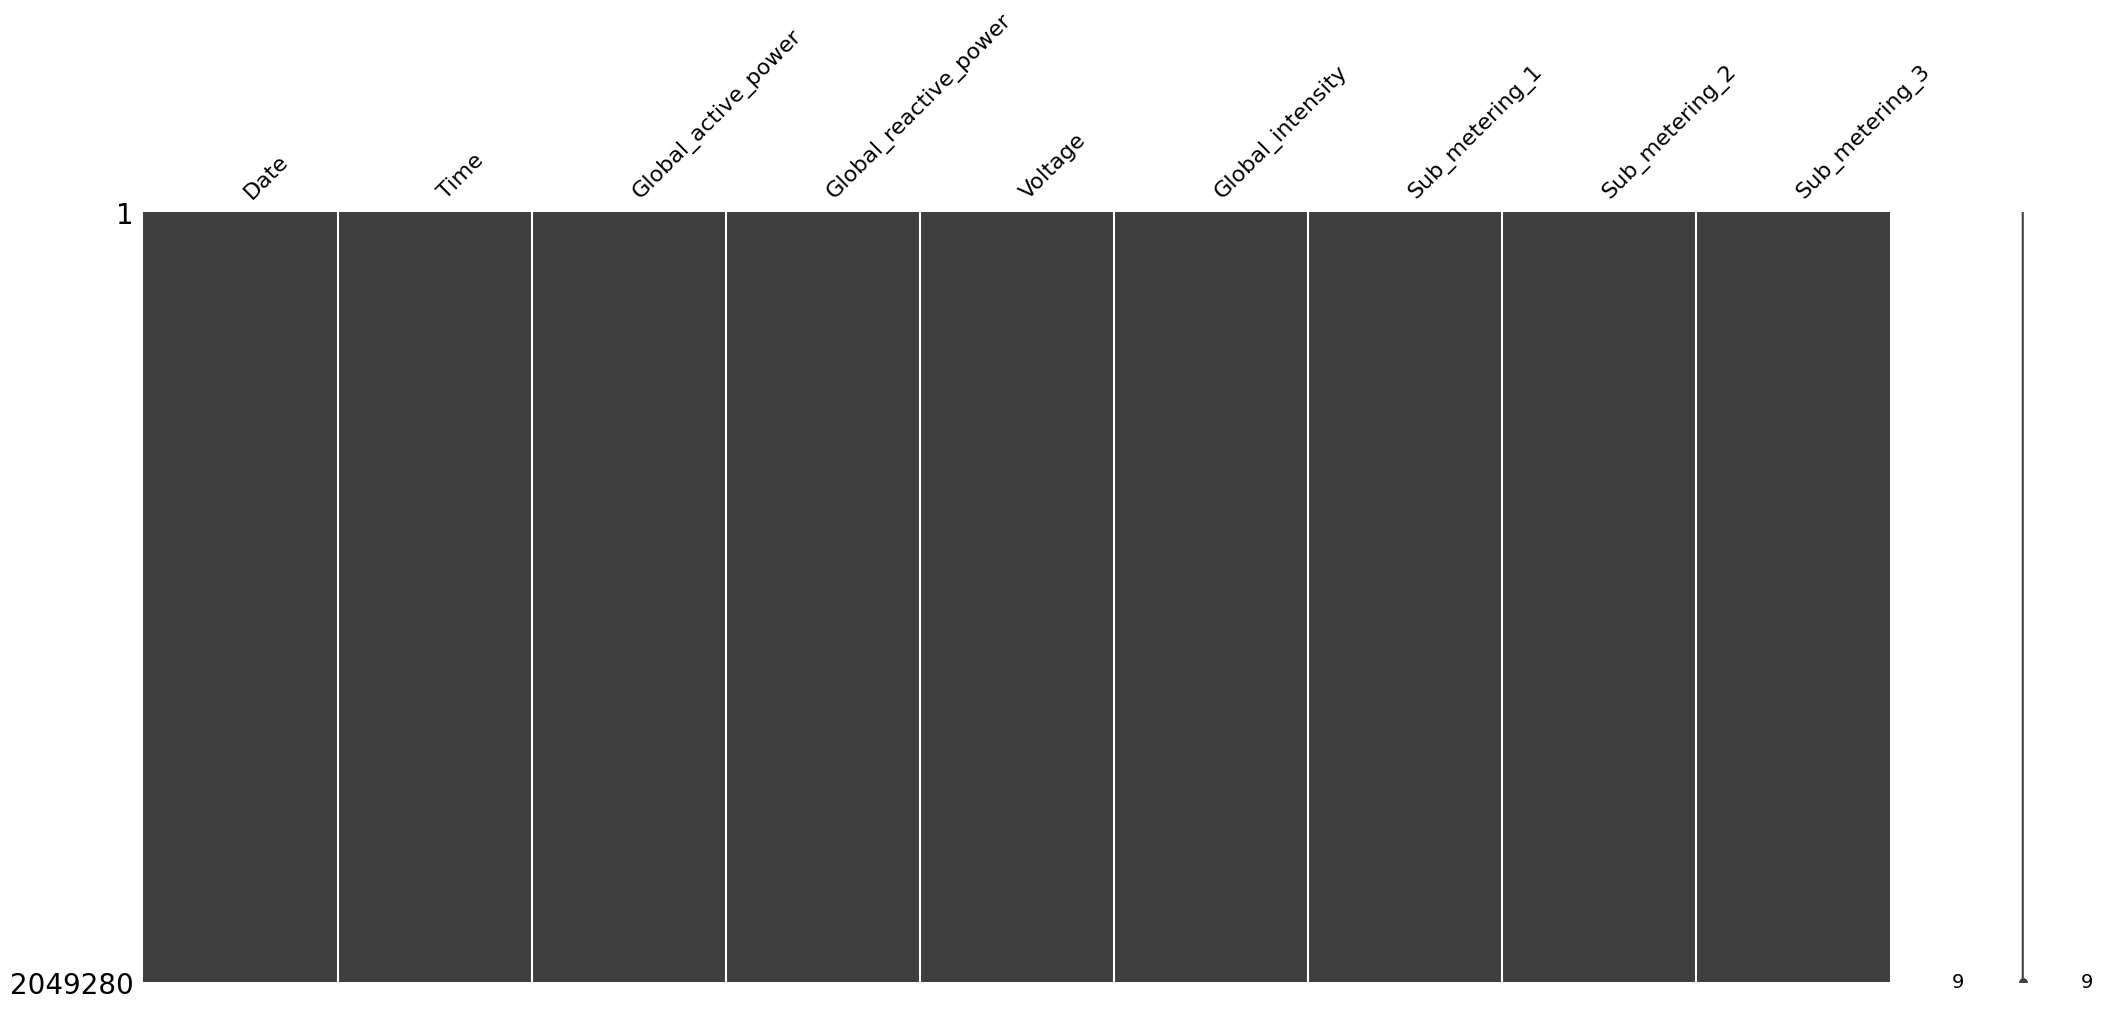

In [5]:
df = create_data_frame(file)
np_arr = df.to_numpy()
print_head(create_numpy_arr(file),10)

In [6]:
def filter_by_power(df1):
    filtered_df1 = df1[df1['Global_active_power'] > 5.0]
    return filtered_df1

def filter_by_power_np(np_arr1):
    filtered_df1 = np_arr1[np_arr1[:, 2] > 5.0]
    return filtered_df1

### Вимірювання часу фільтрування за Global_active_power

In [7]:
print("\nЗадача 1")
start_time = tm.time()
filtered_df = filter_by_power(df)
print_head(filtered_df)
end_time = tm.time() - start_time

start_time_np = tm.time()
filtered_df_np = filter_by_power_np(np_arr)
print_head(filtered_df_np)
end_time_np = tm.time() - start_time_np
print(f"Час виконання:\nPd: {end_time} Np:{end_time_np} сек")


Задача 1
Перші кілька DataFrame:
+---------------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
|        Date         |   Time   | Global_active_power | Global_reactive_power | Voltage | Global_intensity | Sub_metering_1 | Sub_metering_2 | Sub_metering_3 |
+---------------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
| 2006-12-16 00:00:00 | 17:25:00 |        5.36         |         0.436         | 233.63  |       23.0       |      0.0       |      1.0       |      16.0      |
| 2006-12-16 00:00:00 | 17:26:00 |        5.374        |         0.498         | 233.29  |       23.0       |      0.0       |      2.0       |      17.0      |
| 2006-12-16 00:00:00 | 17:27:00 |        5.388        |         0.502         | 233.74  |       23.0       |      0.0       |      1.0       |      17.0      |


### Фільтрування даних за Voltage

In [8]:
def filter_by_voltage(df1):
    filtered_df1 = df1[df1['Voltage'] > 235]
    return filtered_df1

def filter_by_voltage_np(np_arr1):
    filtered_df1 = np_arr1[np_arr1[:, 4] > 235]
    return filtered_df1

### Вимірювання часу фільтрування за Voltage

In [9]:
print("\nЗадача 2")
start_time = tm.time()
filtered_df = filter_by_voltage(df)
print_head(filtered_df)
end_time = tm.time() - start_time

start_time_np = tm.time()
filtered_df_np = filter_by_voltage_np(np_arr)
print_head(filtered_df_np)
end_time_np = tm.time() - start_time_np
print(f"Час виконання:\nPd: {end_time} Np:{end_time_np} сек")


Задача 2
Перші кілька DataFrame:
+---------------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
|        Date         |   Time   | Global_active_power | Global_reactive_power | Voltage | Global_intensity | Sub_metering_1 | Sub_metering_2 | Sub_metering_3 |
+---------------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
| 2006-12-16 00:00:00 | 17:28:00 |        3.666        |         0.528         | 235.68  |       15.8       |      0.0       |      1.0       |      17.0      |
| 2006-12-16 00:00:00 | 17:29:00 |        3.52         |         0.522         | 235.02  |       15.0       |      0.0       |      2.0       |      17.0      |
| 2006-12-16 00:00:00 | 17:30:00 |        3.702        |         0.52          | 235.09  |       15.8       |      0.0       |      1.0       |      17.0      |


### Фільтрування за Global_intensity та споживанням енергії

In [10]:
def filter_by_current_and_consumption(df1):
    filtered_df1 = df1[(df1['Global_intensity'] >= 19) & (df1['Global_intensity'] <= 20)]
    filtered_df1 = filtered_df1[(filtered_df1['Sub_metering_2'] > filtered_df1['Sub_metering_3']) &
                                (filtered_df1['Sub_metering_2'] > filtered_df1['Sub_metering_1'])]
    return filtered_df1

def filter_by_current_and_consumption_np(np_arr1):
    filtered_df1 = np_arr1[(np_arr1[:, 5] >= 19) & (np_arr1[:, 5] <= 20)]
    filtered_df1 = filtered_df1[(filtered_df1[:, 7] > filtered_df1[:, 8]) &
                                (filtered_df1[:, 7] > filtered_df1[:, 6])]
    return filtered_df1

### Вимірювання часу фільтрування за Global_intensity та споживанням енергії

In [11]:
print("\nЗадача 3")
start_time = tm.time()
filtered_df = filter_by_current_and_consumption(df)
print_head(filtered_df)
end_time = tm.time() - start_time

print("\nЗадача 3 (з використанням NumPy)")
start_time_np = tm.time()
filtered_df_np = filter_by_current_and_consumption_np(np_arr)
print_head(filtered_df_np)
end_time_np = tm.time() - start_time_np
print(f"Час виконання:\nPd: {end_time} Np:{end_time_np} сек")


Задача 3
Перші кілька DataFrame:
+---------------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
|        Date         |   Time   | Global_active_power | Global_reactive_power | Voltage | Global_intensity | Sub_metering_1 | Sub_metering_2 | Sub_metering_3 |
+---------------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
| 2006-12-16 00:00:00 | 18:09:00 |        4.464        |         0.136         | 234.66  |       19.0       |      0.0       |      37.0      |      16.0      |
| 2006-12-17 00:00:00 | 01:04:00 |        4.582        |         0.258         | 238.08  |       19.6       |      0.0       |      13.0      |      0.0       |
| 2006-12-17 00:00:00 | 01:08:00 |        4.618        |         0.104         | 239.61  |       19.6       |      0.0       |      27.0      |      0.0       |


### Вибірка випадкових значень та обчислення середнього

In [12]:
def random_sample_average(df1, n=500000):
    sampled_indices = np.random.choice(df1.index, n, replace=True)
    sampled_df = df1.loc[sampled_indices]
    averages1 = sampled_df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()
    return averages1

def random_sample_average_np(np_arr1, n=500000):
    sampled_np = np_arr1[np.random.choice(np_arr1.shape[0], n, replace=True), 6:9]
    averages1 = np.mean(sampled_np, axis=0)
    return averages1

### Вимірювання часу обчислення середнього для випадкової вибірки

In [13]:
print("\nЗадача 4")
start_time = tm.time()
averages = random_sample_average(df, n=500000)
print(averages)
end_time = tm.time() - start_time

print("\nЗадача 4 (з використанням NumPy)")
start_time_np = tm.time()
averages = random_sample_average_np(np_arr, n=500000)
print(averages)
end_time_np = tm.time() - start_time_np
print(f"Час виконання:\nPd: {end_time} Np:{end_time_np} сек")


Задача 4
Sub_metering_1    1.116910
Sub_metering_2    1.314990
Sub_metering_3    6.459126
dtype: float64

Задача 4 (з використанням NumPy)
[1.137826 1.302758 6.452346]
Час виконання:
Pd: 0.5327317714691162 Np:0.6708319187164307 сек


### Складне фільтрування даних

In [14]:
# Задача 5
def complex_filter(df1):
    filtered_df1 = df1[(df1['Time'] > pd.to_datetime('18:00:00').time()) & (df1['Global_active_power'] > 6)
                       & (df1['Sub_metering_2'].gt(df1['Sub_metering_1'], df1['Sub_metering_3']))]

    fh = filtered_df1.iloc[:len(filtered_df1) // 2]
    sh = filtered_df1.iloc[len(filtered_df1) // 2:]
    result = pd.concat([fh.iloc[2::3], sh.iloc[3::4]])

    return result

def complex_filter_np(np_arr1):
    condition = (np_arr1[:, 1].astype('O').astype(dt_time) >= dt_time(18, 0, 0)) & \
                (np_arr1[:, 2] > 6) & \
                (np_arr1[:, 7] > np_arr1[:, 6]) & \
                (np_arr1[:, 7] > np_arr1[:, 8])
    
    filtered_array = np_arr1[condition]

    fh = filtered_array[:len(filtered_array) // 2]
    sh = filtered_array[len(filtered_array) // 2:]
    result = np.concatenate([fh[2::3], sh[3::4]])
    return result

### Вимірювання часу виконання складного фільтрування

In [15]:
print("\nЗадача 5:")
start_time = tm.time()
filtered_df = complex_filter(df)
print_head(filtered_df)
end_time = tm.time() - start_time

start_time_np = tm.time()
filtered_np = complex_filter_np(np_arr)

print_head(filtered_np)
end_time_np = tm.time() - start_time_np
print(f"Час виконання:\nPd: {end_time} Np:{end_time_np} сек")


Задача 5:
Перші кілька DataFrame:
+---------------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
|        Date         |   Time   | Global_active_power | Global_reactive_power | Voltage | Global_intensity | Sub_metering_1 | Sub_metering_2 | Sub_metering_3 |
+---------------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
| 2006-12-16 00:00:00 | 18:07:00 |        6.474        |         0.144         | 231.85  |       27.8       |      0.0       |      37.0      |      16.0      |
| 2006-12-18 00:00:00 | 19:31:00 |        6.158        |         0.442         | 229.08  |       27.0       |      0.0       |      36.0      |      0.0       |
| 2006-12-28 00:00:00 | 21:01:00 |        7.062        |         0.27          | 235.76  |       30.2       |      2.0       |      65.0      |      17.0      |